In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
# Print the shape of the dataset
print("Shape of dataset:", df.shape)

# Print the column names
print("\nColumn names:\n", list(df.columns))

# Print the data types of the columns
print("\nData types of columns:\n", df.dtypes)

# Print the summary statistics of the numeric columns
print("\nSummary statistics of numeric columns:\n", df.describe())

# Print the number of unique values in each column
print("\nNumber of unique values in each column:\n", df.nunique())

# Print the first few rows of the dataset
display("First few rows of dataset:", df.head())

Shape of dataset: (4000, 15)

Column names:
 ['Id', 'gender', 'age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree', 'company', 'decision']

Data types of columns:
 Id                       object
gender                   object
age                       int64
nationality              object
sport                    object
ind-university_grade      int64
ind-debateclub             bool
ind-programming_exp        bool
ind-international_exp      bool
ind-entrepeneur_exp        bool
ind-languages             int64
ind-exact_study            bool
ind-degree               object
company                  object
decision                   bool
dtype: object

Summary statistics of numeric columns:
                age  ind-university_grade  ind-languages
count  4000.000000           4000.000000    4000.000000
mean     26.179000             62.380000       1.

'First few rows of dataset:'

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True


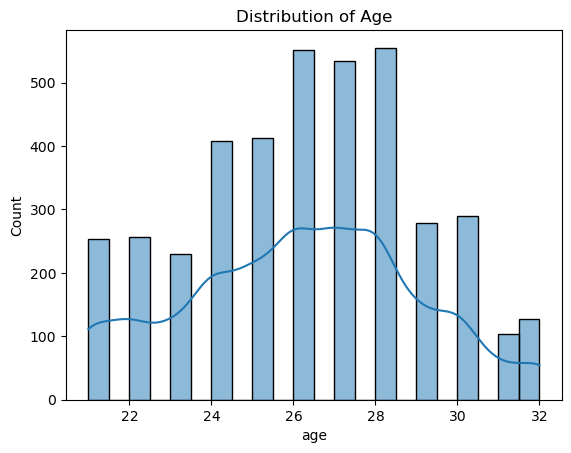

In [4]:

# Visualize the distribution of numerical variables
sns.histplot(data=df, x='age', kde=True)
plt.title('Distribution of Age')
plt.show()

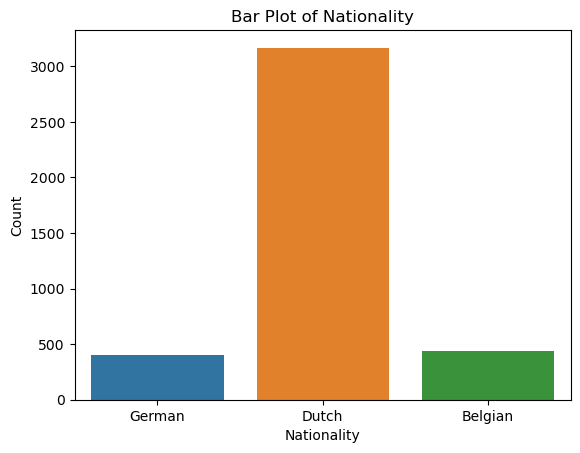

In [5]:
sns.countplot(x='nationality', data=df)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Bar Plot of Nationality')
plt.show()

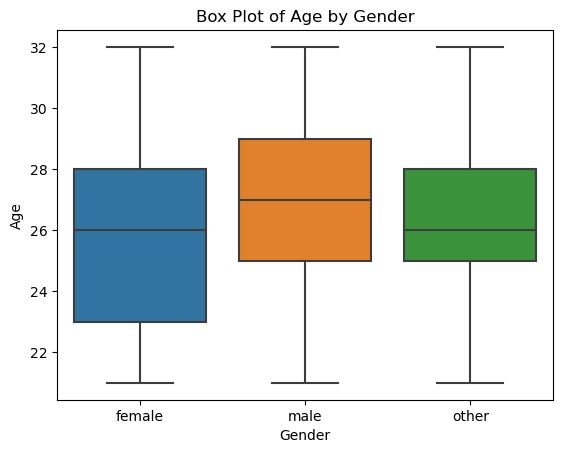

In [6]:
sns.boxplot(x='gender', y='age', data=df)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Box Plot of Age by Gender')
plt.show()


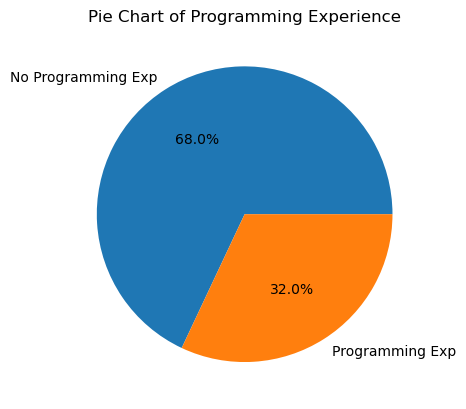

In [7]:
prog_exp_counts = df['ind-programming_exp'].value_counts()
plt.pie(prog_exp_counts, labels=['No Programming Exp', 'Programming Exp'], autopct='%1.1f%%')
plt.title('Pie Chart of Programming Experience')
plt.show()

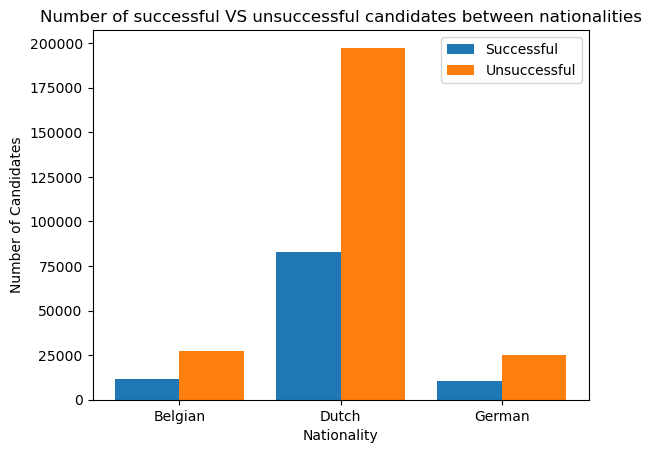

In [8]:
nationality = df.groupby(['nationality']).sum()

# Variables below denote the number of positive candidates and negative candidates between nationalities
belgian_T = nationality.loc['Belgian'][0]
belgian_F = nationality.loc['Belgian'][1]

dutch_T = nationality.loc['Dutch'][0]
dutch_F = nationality.loc['Dutch'][1]

german_T = nationality.loc['German'][0]
german_F = nationality.loc['German'][1]

X = ['Belgian','Dutch','German']
success = [belgian_T, dutch_T, german_T]
unsuccessful = [belgian_F, dutch_F, german_F]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, success, 0.4, label = 'Successful')
plt.bar(X_axis + 0.2, unsuccessful, 0.4, label = 'Unsuccessful')
  
plt.xticks(X_axis, X)
plt.xlabel("Nationality")
plt.ylabel("Number of Candidates")
plt.title("Number of successful VS unsuccessful candidates between nationalities")
plt.legend()
plt.show()

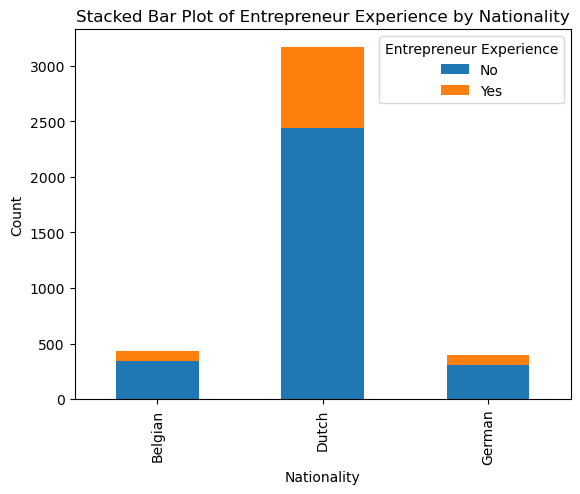

In [9]:
entrepreneur_counts = df.groupby(['nationality', 'ind-entrepeneur_exp']).size().unstack(fill_value=0)
entrepreneur_counts.plot(kind='bar', stacked=True)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Entrepreneur Experience by Nationality')
plt.legend(title='Entrepreneur Experience', labels=['No', 'Yes'])
plt.show()


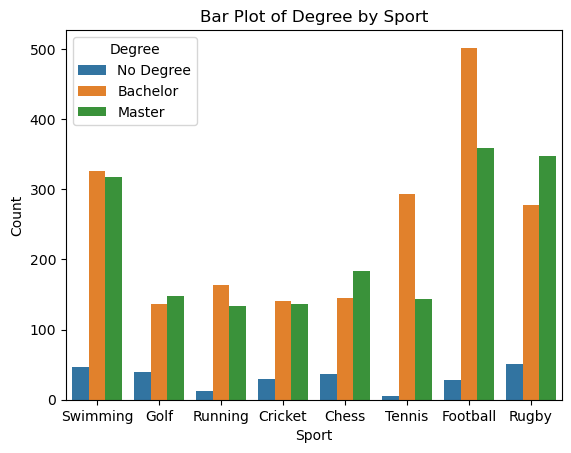

In [10]:
sns.countplot(x='sport', hue='ind-degree', data=df)
plt.xlabel('Sport')
plt.ylabel('Count')
plt.title('Bar Plot of Degree by Sport')
plt.legend(title='Degree', labels=['No Degree', 'Bachelor', 'Master', 'PhD'])
plt.show()


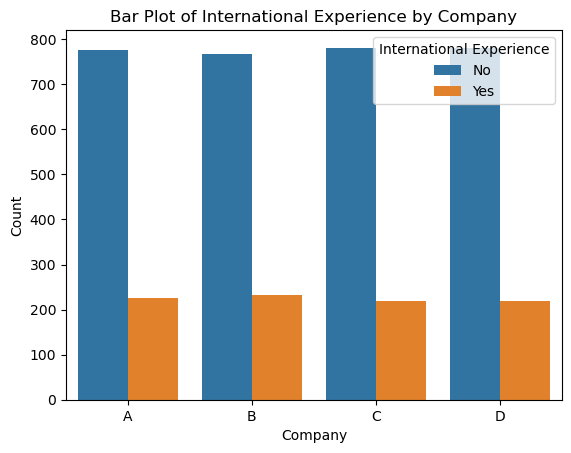

In [11]:
sns.countplot(x='company', hue='ind-international_exp', data=df)
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Bar Plot of International Experience by Company')
plt.legend(title='International Experience', labels=['No', 'Yes'])
plt.show()


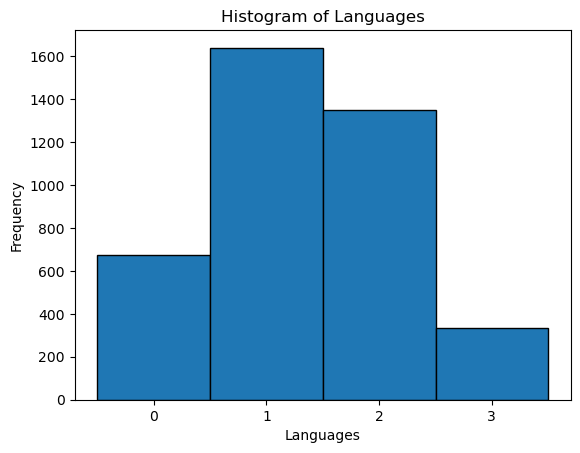

In [12]:
import matplotlib.pyplot as plt

bins = [-0.5, 0.5, 1.5, 2.5, 3.5] # specify the bin edges
plt.hist(df['ind-languages'], bins=bins, edgecolor='black')
plt.xticks(range(4)) # set the x-axis tick labels to the bin centers
plt.xlabel('Languages')
plt.ylabel('Frequency')
plt.title('Histogram of Languages')
plt.show()


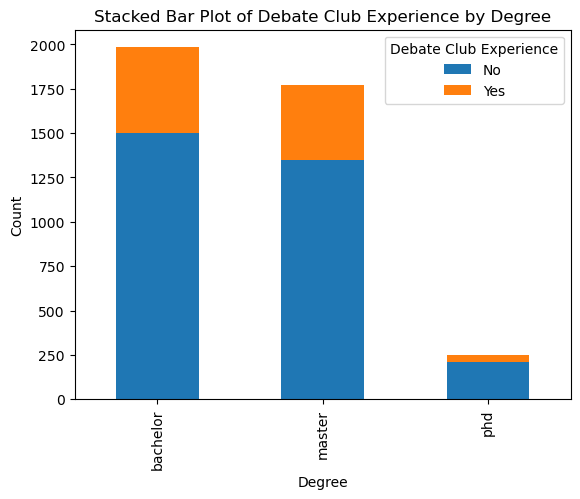

In [13]:
debateclub_counts = df.groupby(['ind-degree', 'ind-debateclub']).size().unstack(fill_value=0)
debateclub_counts.plot(kind='bar', stacked=True)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Debate Club Experience by Degree')
plt.legend(title='Debate Club Experience', labels=['No', 'Yes'])
plt.show()


In [14]:
# Drop any rows with missing values
df = df.dropna()

# Convert categorical variables to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['gender', 'nationality', 'sport', 'ind-degree', 'company'])

# Convert boolean variables to binary values (0 or 1)
bool_cols = ['ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study', 'decision']
df[bool_cols] = df[bool_cols].astype(int)

# Scale the age feature to a range between 0 and 1
df['age'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())

# Rename columns to make them more descriptive
df = df.rename(columns={'ind-university_grade': 'university_grade', 'ind-languages': 'languages'})

# Print the cleaned and prepared data
display(df.head())

,Id,age,university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,languages,ind-exact_study,decision,...,sport_Running,sport_Swimming,sport_Tennis,ind-degree_bachelor,ind-degree_master,ind-degree_phd,company_A,company_B,company_C,company_D
0,x8011e,0.272727,70,0,0,0,0,1,1,1,...,0,1,0,0,0,1,1,0,0,0
1,x6077a,0.454545,67,0,1,0,0,2,1,0,...,0,0,0,1,0,0,1,0,0,0
2,x6006e,0.181818,67,0,1,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
3,x2173b,0.272727,70,0,1,0,0,1,1,1,...,0,0,0,0,1,0,1,0,0,0
4,x6241a,0.454545,59,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0


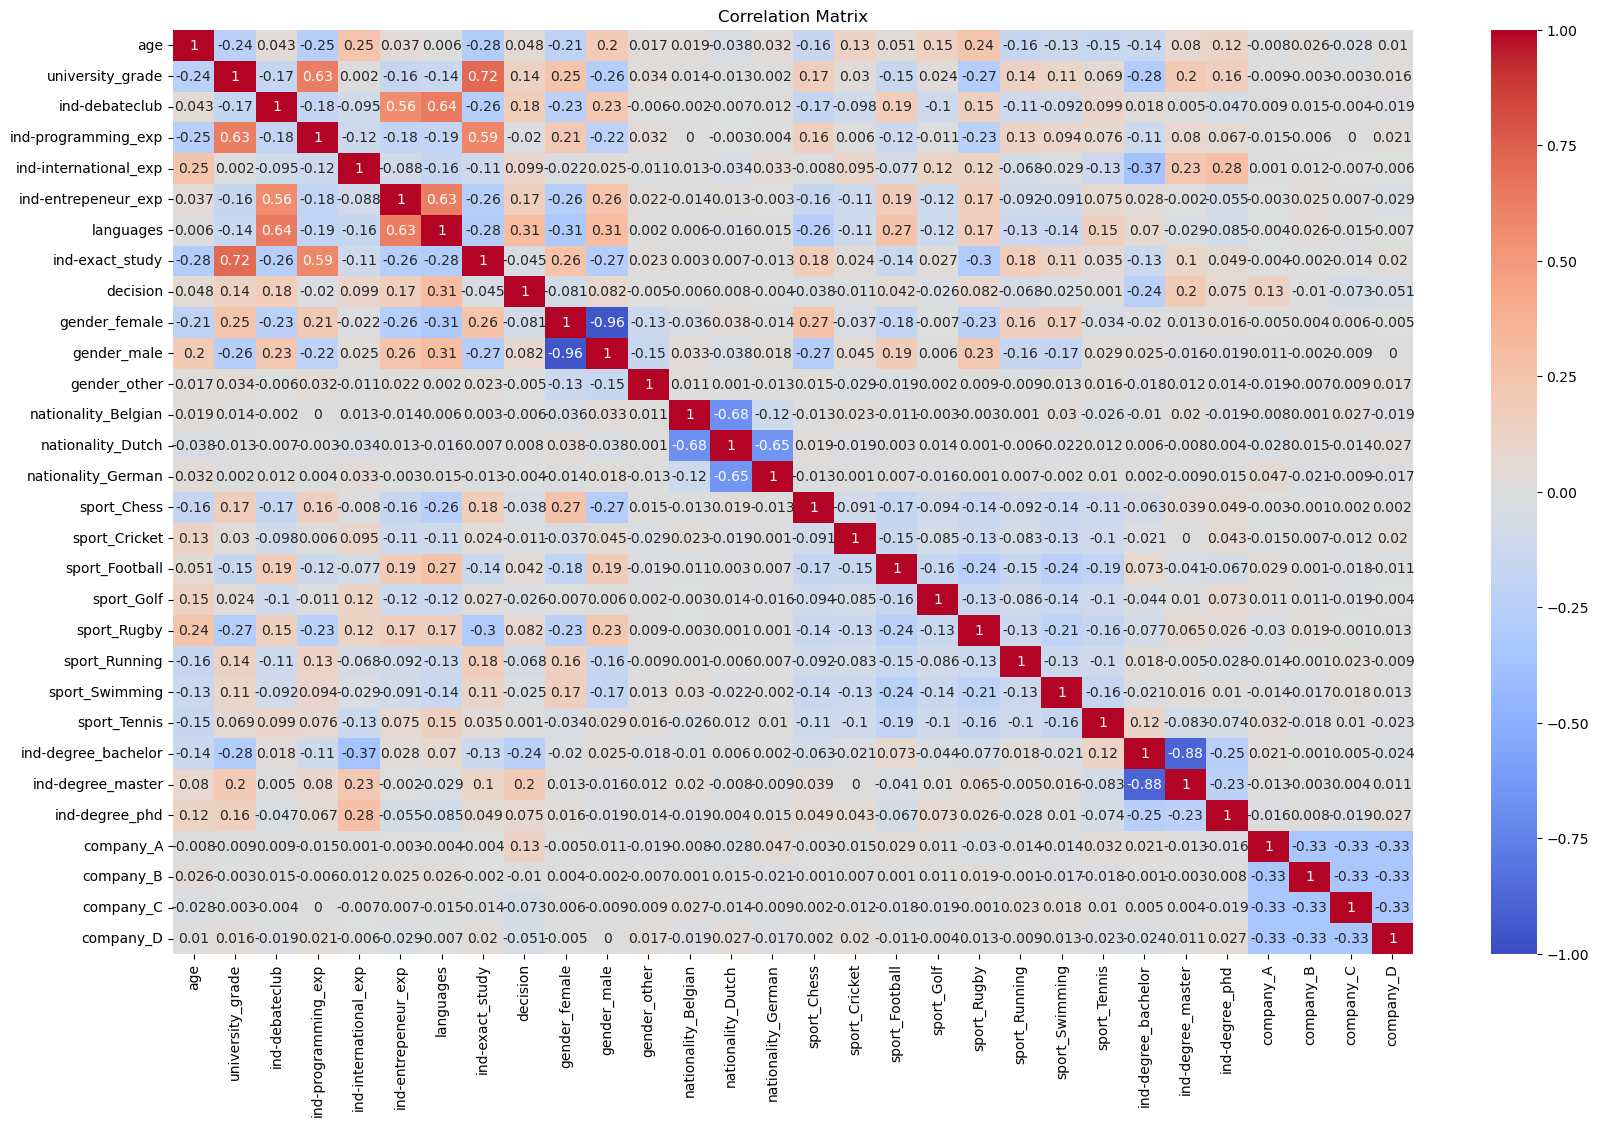

In [15]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr().round(3), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()  

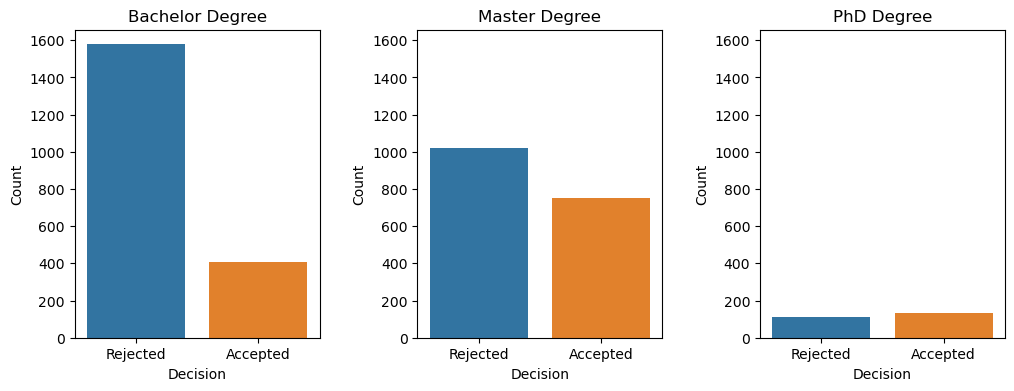

In [16]:
import matplotlib.pyplot as plt

# create a dictionary to map the values in the decision column
decision_map = {0: 'Rejected', 1: 'Accepted'}

# create a figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# create a bar plot for each degree type
sns.countplot(x=df[df['ind-degree_bachelor']==1]['decision'].map(decision_map), ax=ax[0])
sns.countplot(x=df[df['ind-degree_master']==1]['decision'].map(decision_map), ax=ax[1])
sns.countplot(x=df[df['ind-degree_phd']==1]['decision'].map(decision_map), ax=ax[2])

# set a common y-axis limit for all subplots
y_max = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1], ax[2].get_ylim()[1])
ax[0].set_ylim(0, y_max)
ax[1].set_ylim(0, y_max)
ax[2].set_ylim(0, y_max)

# add labels and title to each subplot
ax[0].set_xlabel('Decision')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['Rejected', 'Accepted'])
ax[0].set_title('Bachelor Degree')

ax[1].set_xlabel('Decision')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(['Rejected', 'Accepted'])
ax[1].set_title('Master Degree')

ax[2].set_xlabel('Decision')
ax[2].set_ylabel('Count')
ax[2].set_xticklabels(['Rejected', 'Accepted'])
ax[2].set_title('PhD Degree')

# adjust the space between subplots
plt.subplots_adjust(wspace=0.4)

# display the plot
plt.show()


In [17]:
# count the number of males and females with each decision value
male_decision_counts = df[df['gender_male']==1]['decision'].value_counts()
female_decision_counts = df[df['gender_female']==1]['decision'].value_counts()

# print the results
print('Male:')
print(male_decision_counts)
print('\nFemale:')

Male:
0    1377
1     750
Name: decision, dtype: int64

Female:


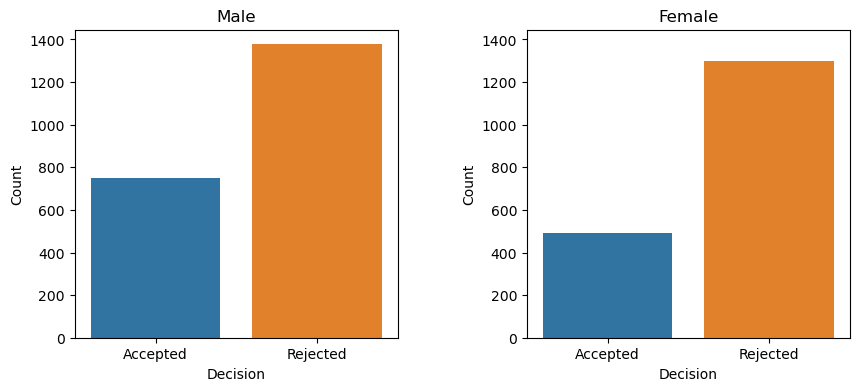

In [18]:
import matplotlib.pyplot as plt

# create a dictionary to map the values in the decision column
decision_map = {0: 'Rejected', 1: 'Accepted'}

# create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# create a bar plot for each gender
sns.countplot(x=df[df['gender_male']==1]['decision'].map(decision_map), order=['Accepted', 'Rejected'], ax=ax[0])
sns.countplot(x=df[df['gender_female']==1]['decision'].map(decision_map), order=['Accepted', 'Rejected'], ax=ax[1])

# set a common y-axis limit for all subplots
y_max = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])
ax[0].set_ylim(0, y_max)
ax[1].set_ylim(0, y_max)

# add labels and title to each subplot
ax[0].set_xlabel('Decision')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['Accepted', 'Rejected'])
ax[0].set_title('Male')

ax[1].set_xlabel('Decision')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(['Accepted', 'Rejected'])
ax[1].set_title('Female')

# adjust the space between subplots
plt.subplots_adjust(wspace=0.4)

# display the plot
plt.show()
